## Demonstration of AUC of ROC

ROC stands for "Receiver Operating Characteristic." The ROC curve is a graphical representation that illustrates the performance of a binary classifier system as its discrimination threshold is varied. It's one of the most commonly used metrics for evaluating the performance of machine learning algorithms, particularly in problems where the classes are imbalanced.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve

sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'grid.linestyle':'--'})

Here we are going to use the breast cancer data to build a simple logistic regression model

In [2]:
cancer_data = pd.read_csv("https://raw.githubusercontent.com/changyaochen/MECE4520/master/data/breast_cancer.csv")
cancer_data["label"] = cancer_data["diagnosis"].apply(lambda x: 0 if x == "B" else 1)
cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_mean,...,texture_extreme,perimeter_extreme,area_extreme,smoothness_extreme,compactness_extreme,concavity_extreme,concave_extreme,symmetry_extreme,fractal_extreme,label
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [3]:
# fit the logistic regression model
lr_model = LogisticRegression(penalty="none", random_state=42)
lr_model.fit(
    X=cancer_data[["radius_mean"]],
    y=cancer_data["label"],
)

/Users/changyaochen/.pyenv/versions/3.10.11/envs/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(penalty='none', random_state=42)

In [4]:
# make prediction on the training dataset
prediction_results = pd.DataFrame(
    data={
        "probability": lr_model.predict_proba(cancer_data[["radius_mean"]])[:, 1],
        "label": cancer_data["label"],
    }
)

# take a look some randome samples
prediction_results.sample(10, random_state=123).sort_values("probability")

,probability,label
273,0.005616,0
333,0.026138,0
469,0.037853,0
297,0.043490,1
216,0.049435,0
178,0.141994,0
500,0.574265,0
209,0.631112,0
201,0.947007,1
85,0.978835,1


In [5]:
# calculate the values needed for the auc of roc
fpr, tpr, thresholds = roc_curve(
    y_true=prediction_results["label"],
    y_score=prediction_results["probability"],
)

roc_data = pd.DataFrame(
    data={
        "fpr": fpr,
        "tpr": tpr,
        "thresholds": thresholds,
    },
)

roc_data.tail()

,fpr,tpr,thresholds
183,0.871148,1.0,0.006633
184,0.876751,1.0,0.006445
185,0.887955,1.0,0.005692
186,0.893557,1.0,0.005616
187,1.000000,1.0,0.000325


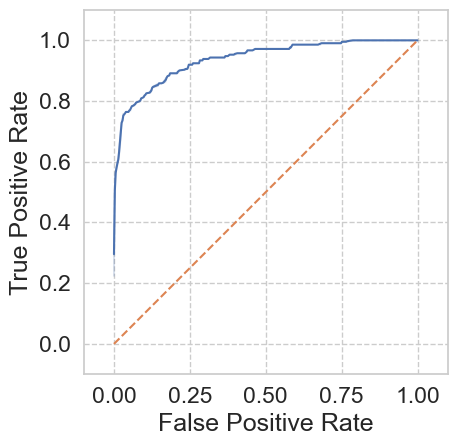

In [6]:
# make plot
plt.figure()
# plot the ROC
sns.lineplot(x=fpr, y=tpr)
# plot the diagonal line
sns.lineplot(x=[0, 1], y=[0, 1], linestyle="--")


plt.gca().set_aspect("equal")
plt.gca().set_xlabel("False Positive Rate")
plt.gca().set_ylabel("True Positive Rate")
plt.gca().set_xlim([-.1, 1.1])
plt.gca().set_ylim([-.1, 1.1])
plt.tight_layout()
plt.show()